In [5]:
import pickle
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

with open('camera.p', 'rb') as f:
    objpoints, imgpoints = pickle.load(f)

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

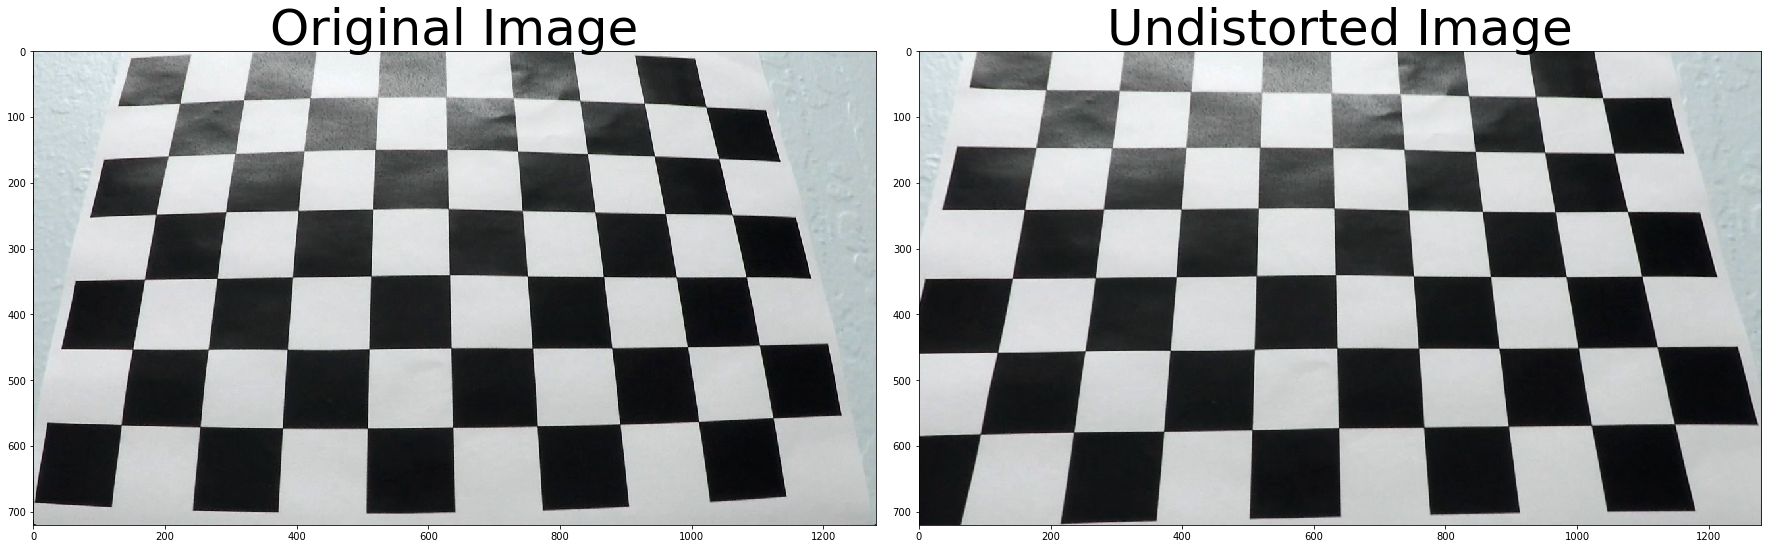

In [6]:
# performs the camera calibration, image distortion correction and returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    #undist = np.copy(img)  # Delete this line
    return undist


img = cv2.imread(images[13])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
undistorted = cal_undistort(img, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)